In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv('/content/drive/My Drive/spam_detection/spam.csv')
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df['Category'] = df['Label']
df['Message'] = df['EmailText']
df.head()

,Label,EmailText,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ...",ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df = df.drop(['Label','EmailText'],axis=1)
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    653  Please call our customer service representativ...    4

In [ ]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


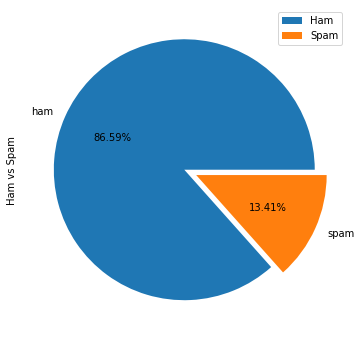

In [ ]:
import matplotlib.pyplot as plt
df['Category'].value_counts().plot(kind = 'pie', explode=[0,0.1], figsize=(6,6), autopct='%1.2f%%')
plt.ylabel('Ham vs Spam')
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.25)
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_train

3879    Hi juan. Im coming home on fri hey. Of course ...
50      What you thinked about me. First time you saw ...
3847    Can you plz tell me the ans. BSLVYL sent via f...
4746    When you just put in the + sign, choose my num...
2941    Hello. No news on job, they are making me wait...
                              ...                        
1963    Yes :)it completely in out of form:)clark also...
1992    Free tones Hope you enjoyed your new content. ...
3189    Hi neva worry bout da truth coz the truth will...
2493    they released another Italian one today and it...
3524    I not free today i haf 2 pick my parents up to...
Name: Message, Length: 4179, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]
X_train_count.shape

(4179, 7478)

In [ ]:
X = v.fit_transform(df['Message']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)
X_test_count = v.transform(X_test)
y_pred = model.predict(X_test_count)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred, normalize=True)
score*100

98.42067480258436

In [ ]:
from sklearn.metrics import fbeta_score, classification_report
fbeta_score(y_test, y_pred, beta=0.5)

0.9594298245614035

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9842067480258435

In [ ]:
import pickle
saved_model = pickle.dumps(model)
modelfrom_pickle = pickle.loads(saved_model)
y_pred = modelfrom_pickle.predict(X_test_count)
accuracy_score(y_test, y_pred)

0.9842067480258435

In [ ]:
import joblib
joblib.dump(model, 'spam_detector')

['spam_detector']